# Logistic Regression In-Class Exercises

Do these exercises along with the videos.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 1.  Linear Classifier

Given the data below, use the `plt.scatter()` function to plot the data points with different colors for the classes.

[ True  True False False  True False]
[False False  True  True False  True]


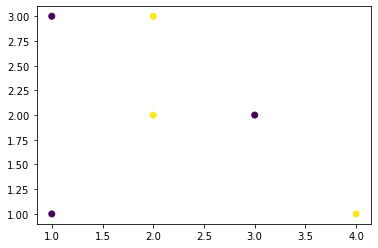

In [104]:
X = np.array([[1,1], [1,3], [2,2], [2,3], [3,2], [4,1]])
y = np.array([0,0,1,1,0,1], dtype=np.int)

# TODO
plt.scatter(X[:,0], X[:,1], c=y)

You should see that the data is not linearly separable.
Find a linear classifier that makes a minimal number of errors on the training data.

Write a function `predict()` function for the classifer and get the predicted labels with the command:

    yhat = predict(X)

Print `yhat` and `y`.  How many errors does your classifier make?

In [88]:
def predict(X):
    # TODO
    yhat = X[:,0] < 
    return yhat

# TODO
#   yhat = predict(X)
#   ...

# Question 2:   Logistic Model

Consider the model for the passing a test:

    P(pass test) = 1/(1+exp(-z)),  z =  w0 + w1*hrs_alone + w2*hrs_tutor
    
where `hrs_alone` is the number of hours studied alone and `hrs_tutor` is the number of hours with a tutor.
Given the values below find `w0` for the probability = 0.6.


In [89]:
hrs_alone = 4
hrs_tutor = 1
w1 = 0.2
w2 = 0.5
prob = 0.6

# TODO
#   w0 = ...

Given the values above, plot the probability of passing as a function of `hrs_tutor` in the range of 0 to 10 hours.

In [90]:
# TODO

## Question 3.  Calculating and Plotting the Binary Cross Entropy Loss

You are given the scalar data `x` and `y` with binary class labels below.

In [91]:
x = np.array([-1,1,3,4,5])
y = np.array([0,0,1,0,1])

Consider a linear classifier of the form:

    z = w[0] + w[1]*x
    yhat = 1 if z > 0 and 0 if z < 0
    
Find `w` that makes at most one error on the training data. Call this selection `w_manual` since you have manually chosen it.

In [92]:
# TODO
#   w_manual = ...

Now consider a logistic model,

    z = w[0] + w[1]*x
    p(y=1|x) = 1 / (1 + exp(-z))
    
Complete the function below that computes the binary cross entropy for a given vector `w` and training data `x,y`. Use the function to compute the BCE loss for the `w_manual`. 

In [93]:
def bce_loss(x,y,w):
    # TODO
    # J = BCE loss
    return J

# Print the loss for `w_manual`

Now consider a set of `w = [w0, 0.5]`.  
* Plot the BCE loss over 100 values `w0` from -2.5 to 0  
* What value of `w0`gives the minimum BCE loss?   Call this `w0_opt`.
* What is the minimum BCE loss?

In [94]:
nt = 100
w0_test = np.linspace(-2.5,0,nt)
w1 = 0.5

# TODO
#   loss = ...
#   w0_opt = ...

Suppose you select `w1=0.5`and `w0=w0_opt` from the previous section.  What values `x` is `P(y=1|x) > 0.5`?

In [95]:
# TODO.  Describe the set

# We have P(y=1|x) > 0.5 <=> z > 0  <=> w0 + w1*x > 0 <=> x > t = -w0/w1

## Question 4.  Heart Attack Fit

In this exercise, we fit heart attack data from the UCI website.  We can load it as follows.

In [96]:
## Generate synthetic data
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, na_values='?',header=None, names=names)
df = df.dropna()

Print the first few rows of the data frame.
Print the number of attributes of number of samples

In [97]:
# TODO

The target will be `num` which is the number of arterial blockages.  Get the target vector `y` from the `df[num]` column.  To make this a binary classification problem, let `y[i] == 1` whenever the number is greater than 0.  Otherwise, `y[i] == 0`.  You will have to convert the value to integer.

In [98]:
# TODO
#   y = ...

Get the data matrix `X` from all the attributes other than `num`.  

In [99]:
# TODO
#  X = ...

Split the data into traing and test with `test_size=0.25`.

In [100]:
from sklearn.model_selection import train_test_split

# TODO:
#   Xtr, Xts, ytr, yts = ...

Scale the training and test data with the `StandardScaler`. 

In [101]:
from sklearn.preprocessing import StandardScaler

# TODO
#  Xtr1 = ...
#  Xts1 = ...

Fit the data on the training data set, predict on the test and measure the accuracy.

In [102]:
# TODO

Create a stem plot of the coefficients.  

In [103]:
# TODO

## Further exercises

If you want to try a little more, see if you can use L1 regularization to find the features that are best in explaining heart blockages.